## 케라스 및 텐서플로 훑어보기

### 1. 텐서플로 시작하기

#### 모두 1 또는 0인 텐서

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
x = tf.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

#### 랜덤 텐서

In [5]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
x
# 평균이 0이고, 표준편차가 1인 정규분포에서 무작위로 값을 뽑아 텐서를 생성합니다.

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.21866976],
       [-0.1556085 ],
       [ 0.07551868]], dtype=float32)>

In [7]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
x
# 0과 1 사이의 균등 분포에서 뽑은 랜덤한 값으로 만든 텐서.

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.6178056 ],
       [0.29231465],
       [0.52007806]], dtype=float32)>

#### 넘파이 배열에 값 할당하기

In [8]:
import numpy as np

x = np.ones(shape=(2,2))
x[0,0] = 0
x

array([[0., 1.],
       [1., 1.]])

#### 텐서플로 변수 만들기

In [10]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.4322313 ],
       [-0.85043204],
       [ 0.59977096]], dtype=float32)>

#### 텐서플로 변수에 값 할당하기

In [11]:
v.assign(tf.ones(shape=(3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

#### 변수 일부에 값 할당하기

In [12]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### assign_add() 사용하기

In [13]:
v.assign_add(tf.ones(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### GradientTape API

In [16]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [18]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration
# 바깥쪽 테이프가 안쪽 테이프의 그레이디언트를 계산

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

### 텐서플로 선형 분류기

#### 2D 평면에 두 클래스의 랜덤한 포인트 생성

In [20]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

#### 두 클래스를 (2000,2) 크기의 배열 쌓기

In [21]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#### (0과 1로 구성된) 타깃 생성하기

In [22]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype=np.float32),
                     np.ones((num_samples_per_class, 1), dtype=np.float32)))

#### 두 클래스의 포인트를 그래프로 그리기

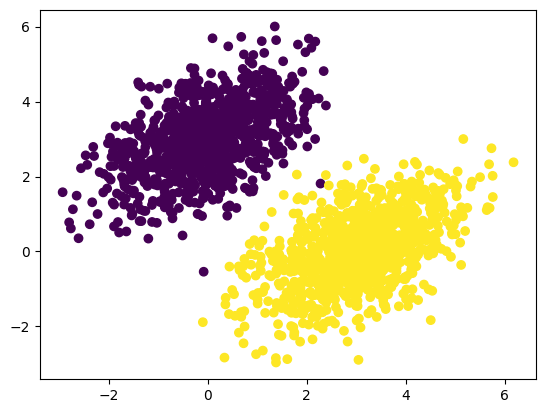

In [23]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

#### 선형 분류기의 변수 만들기

In [24]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

#### 정방향 패스 함수

In [25]:
def model(inputs):
    return tf.matmul(inputs, W) + b

#### 평균 제곱 오차 손실 함수

In [26]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

#### 훈련 스텝 함수

In [27]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#### 배치 훈련 루프

In [28]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss:.4f}')

0번째 스텝의 손실 : 2.0877
1번째 스텝의 손실 : 0.1567
2번째 스텝의 손실 : 0.1046
3번째 스텝의 손실 : 0.0928
4번째 스텝의 손실 : 0.0864
5번째 스텝의 손실 : 0.0810
6번째 스텝의 손실 : 0.0762
7번째 스텝의 손실 : 0.0717
8번째 스텝의 손실 : 0.0677
9번째 스텝의 손실 : 0.0640
10번째 스텝의 손실 : 0.0606
11번째 스텝의 손실 : 0.0575
12번째 스텝의 손실 : 0.0546
13번째 스텝의 손실 : 0.0520
14번째 스텝의 손실 : 0.0497
15번째 스텝의 손실 : 0.0475
16번째 스텝의 손실 : 0.0455
17번째 스텝의 손실 : 0.0437
18번째 스텝의 손실 : 0.0420
19번째 스텝의 손실 : 0.0405
20번째 스텝의 손실 : 0.0391
21번째 스텝의 손실 : 0.0378
22번째 스텝의 손실 : 0.0366
23번째 스텝의 손실 : 0.0355
24번째 스텝의 손실 : 0.0346
25번째 스텝의 손실 : 0.0337
26번째 스텝의 손실 : 0.0328
27번째 스텝의 손실 : 0.0321
28번째 스텝의 손실 : 0.0314
29번째 스텝의 손실 : 0.0308
30번째 스텝의 손실 : 0.0302
31번째 스텝의 손실 : 0.0297
32번째 스텝의 손실 : 0.0292
33번째 스텝의 손실 : 0.0287
34번째 스텝의 손실 : 0.0283
35번째 스텝의 손실 : 0.0280
36번째 스텝의 손실 : 0.0276
37번째 스텝의 손실 : 0.0273
38번째 스텝의 손실 : 0.0270
39번째 스텝의 손실 : 0.0268


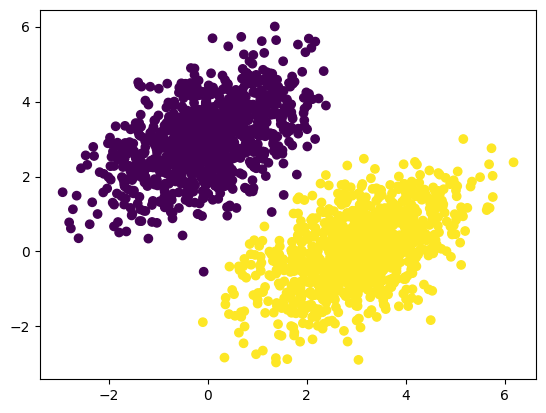

In [29]:
predictions=model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

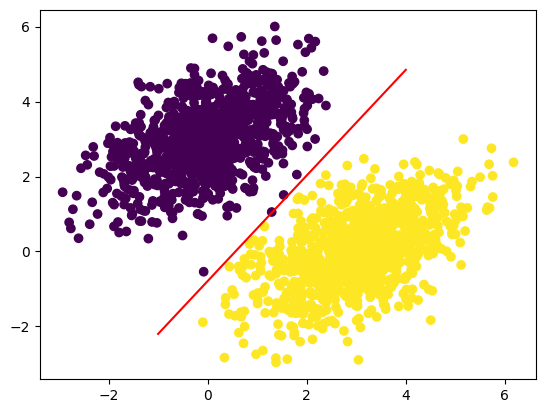

In [30]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1]*x + (0.5-b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

### Keras API

#### Keras의 Layer 클래스

In [31]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal',)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

#### 자동 크기 추론 : 동적으로 층 만들기

In [32]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

In [35]:
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

In [36]:
model = keras.Sequential([
    SimpleDense(32, activation='relu'),
    SimpleDense(64, activation='relu'),
    SimpleDense(32, activation='relu'),
    SimpleDense(10, activation='softmax')
])

#### 컴파일

In [38]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', # optimizer 지정 : RMSprop
              loss='mean_squared_error', # 손실함수 지정 : 평균 제곱 오차
              metrics=['accuracy']) # 측정 자료를 리스트로 지정, 평가 지표로 정확도 사용

In [41]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

#### fit 메서드

In [42]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
history.history

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 11.6147 - binary_accuracy: 0.4525
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 11.1226 - binary_accuracy: 0.4500
Epoch 3/5
16/16 [==============================] - 0s 950us/step - loss: 10.7039 - binary_accuracy: 0.4480
Epoch 4/5
16/16 [==============================] - 0s 960us/step - loss: 10.3038 - binary_accuracy: 0.4460
Epoch 5/5
16/16 [==============================] - 0s 823us/step - loss: 9.9139 - binary_accuracy: 0.4440


{'loss': [11.614749908447266,
  11.122593879699707,
  10.703904151916504,
  10.303816795349121,
  9.913928031921387],
 'binary_accuracy': [0.45249998569488525,
  0.44999998807907104,
  0.4480000138282776,
  0.44600000977516174,
  0.4440000057220459]}

#### validation data 매개변수 사용

In [43]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.1348 - binary_accuracy: 0.9557 - val_loss: 0.0342 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0699 - binary_accuracy: 0.9579 - val_loss: 0.0662 - val_binary_accuracy: 0.9883
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0693 - binary_accuracy: 0.9636 - val_loss: 0.1403 - val_binary_accuracy: 0.9367
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0698 - binary_accuracy: 0.9593 - val_loss: 0.2228 - val_binary_accuracy: 0.7983
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0693 - binary_accuracy: 0.9579 - val_loss: 0.1094 - val_binary_accuracy: 0.9517


In [46]:
predictions = model.predict(val_inputs, batch_size=128)
predictions[:10]

array([[0.28402957],
       [1.347608  ],
       [1.4263623 ],
       [1.595792  ],
       [0.0049054 ],
       [0.35986277],
       [1.1142511 ],
       [1.3418944 ],
       [1.3485491 ],
       [1.2791924 ]], dtype=float32)

## Notes

##### 텐서플로 텐서

- 텐서플로 텐서에는 값을 할당하지 못한다.

- 텐서플로 변수의 상태는 assign 메서드로 수정할 수 있다.

##### 텐서 연산

- tf.square() : 제곱을 계산한다.

- tf.sqrt() : 제곱근을 계산한다.

- tf.matmul(a,b) : 두 텐서의 점곱을 계산한다.

##### GradientTape 블록

- GradientTape 블록을 시작하고 하나 또는 여러 입력 텐서에 대해 계산을 수행한 후 입력에 대해 결과의 그레이디언트를 구하면 된다.

- gradient = tape.gradient(loss, weights) : 이를 통해 가중치에 대한 모델 손실의 그레이디언트를 계산하는데 가장 널리 사용된다.

##### 층 : 딥러닝의 구성 요소

- 층은 하나 이상의 텐서를 입력으로 받고 하나 이상의 텐서를 출력하는 데이터 처리 모듈

- 어떤 종류의 층은 상태가 없지만 대부분의 경우 가중치라는 층의 상태를 가진다. 

- 가중치는 확률적 경사하강법으로 학습되는 하나 이상의 텐서이며 여기에 신경망이 학습한 지식이 담겨있다.

##### 컴파일 단계 : 학습 과정 설정

- 손실 함수(목적 함수) : 훈련 과정에서 최소화할 값. 현재 작업에 대한 성공의 척도

- 옵티마이저 : 손실 함수를 기반으로 네트워크가 어떻게 업데이트 될지 결정. 특정 종류의 확률적 경사 하강법으로 구현

- 측정 지표 : 훈련과 검증과정에서 모니터링할 성공의 척도

```
손실

CategopricalCrossentropy
SparceCategoricalCrossentropy
BinaryCrossentropy
MeanSquaredError
KLDivergence
CosineSimilarity

측정 지표

CategoricalAccuracy
SparceCategoricalAccuracy
BinaryAccuracy
AUC
Precision
Recall
```

##### fit() 메서드

- 훈련할 데이터(입력과 타깃) : 일반적으로 넘파이 배열이나 텐서플로 Dataset 객체로 전달

- 훈련할 에포크 횟수 : 전달할 데이터에서 훈련 루프를 몇번이나 반복할지 알려준다.

- 미니 배치 경사하강법의 각 에포크에서 사용할 배치 크기: 가중치 업데이트 단계에서 그레이디언트를 계산하는데 사용될 훈련 샘플 개수